# Loading graph

In [1]:
from ogb.nodeproppred import NodePropPredDataset

In [2]:
dataset = NodePropPredDataset(name="ogbn-arxiv")

/home/marcovinha/instruct_glm_llama_3_3/.venv/lib/python3.10/site-packages/ogb/nodeproppred/dataset.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_dict = torch.

In [3]:
graph, labels = dataset[0]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
from umap.umap_ import UMAP
from matplotlib.colors import ListedColormap


def reduce_dimensions(vectors):
    reducer = UMAP()
    reducer.fit(vectors)
    vectors = reducer.transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]

    return x_vals, y_vals


def plot_embeddings(x_vals, y_vals, labels):
    random.seed(0)
    plt.figure(figsize=(12, 12))

    scatter = plt.scatter(
        x_vals,
        y_vals,
        c=labels,
        cmap=ListedColormap(plt.cm.tab20(np.linspace(0, 1, 20)).tolist() * 2),
        s=10,  # Adjust size of points if needed
        alpha=0.8,  # Adjust transparency for better visibility
    )

    plt.colorbar(scatter, ticks=np.arange(0, 40, step=1), label="Classes")
    plt.title("2D Embedding Visualization with Class Colors")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

In [5]:
x, y = reduce_dimensions(graph["node_feat"])

/home/marcovinha/instruct_glm_llama_3_3/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/marcovinha/instruct_glm_llama_3_3/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


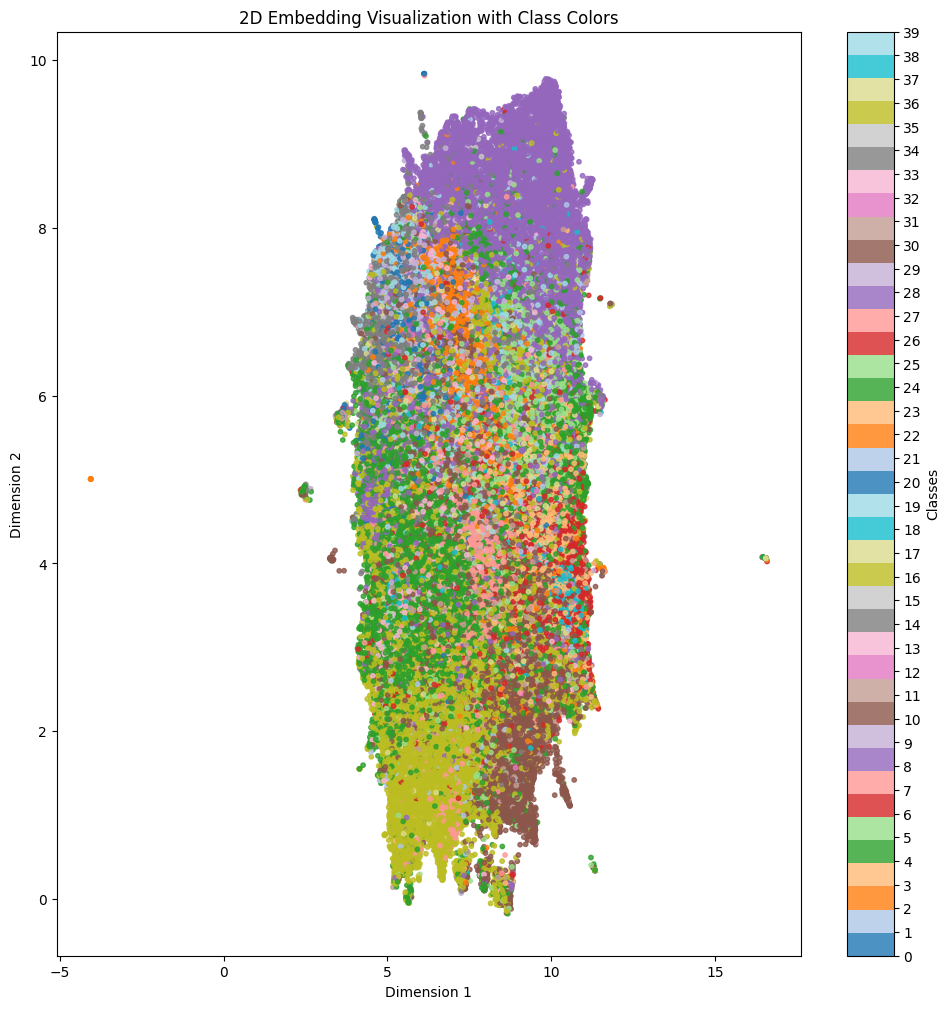

In [6]:
plot_embeddings(x, y, labels)

# Loading text features

In [7]:
import pandas as pd

text_features = pd.read_csv(
    "../titleabs.tsv",
    sep="\t",
    header=None,
    skiprows=1,
    names=["paper_id", "title", "abstract"],
    index_col="paper_id",
)

text_features = text_features.dropna()
text_features.index = text_features.index.map(int)
text_features

,title,abstract
paper_id,,
549074,a novel methodology for thermal analysis a 3 d...,The semiconductor industry is reaching a fasci...
630234,spreadsheets on the move an evaluation of mobi...,The power of mobile devices has increased dram...
803423,multi view metric learning for multi view vide...,Traditional methods on video summarization are...
1102481,big data analytics in future internet of things,Current research on Internet of Things (IoT) m...
1532644,machine learner for automated reasoning 0 4 an...,Machine Learner for Automated Reasoning (MaLAR...
...,...,...
3012554562,federated visual classification with real worl...,Federated Learning enables visual models to be...
3012555423,kernel quantization for efficient network comp...,This paper presents a novel network compressio...
3012556759,generating electronic health records with mult...,Sharing electronic health records (EHRs) on a ...


In [8]:
node_idx_to_paper_id = pd.read_csv(
    "./dataset/ogbn_arxiv/mapping/nodeidx2paperid.csv",
    index_col=0,
    names=["node_idx", "paper_id"],
    header=None,
    skiprows=1,
)
node_idx_to_paper_id

,paper_id
node_idx,
0,9657784
1,39886162
2,116214155
3,121432379
4,231147053
...,...
169338,3011696425
169339,3011708313
169340,3011798063


In [9]:
node_text_features = pd.merge(
    node_idx_to_paper_id,
    text_features,
    left_on="paper_id",
    right_on=text_features.index,
)
node_text_features.index.names = ["node_idx"]

In [10]:
node_text_features["publishing_year"] = graph["node_year"]
node_text_features

,paper_id,title,abstract,publishing_year
node_idx,,,,
0,9657784,evasion attacks against machine learning at te...,"In security-sensitive applications, the succes...",2013
1,39886162,how hard is computing parity with noisy commun...,We show a tight lower bound of $\Omega(N \log\...,2015
2,116214155,on the absence of the rip in real world applic...,The purpose of this paper is twofold. The firs...,2014
3,121432379,a promise theory perspective on data networks,Networking is undergoing a transformation thro...,2014
4,231147053,analysis of asymptotically optimal sampling ba...,Over the last 20 years significant effort has ...,2014
...,...,...,...,...
169338,3011696425,sentinet detecting localized universal attacks...,SentiNet is a novel detection framework for lo...,2020
169339,3011708313,interpretable mtl from heterogeneous domains u...,Multi-task learning (MTL) aims at improving th...,2020
169340,3011798063,learning compositional rules via neural progra...,"Many aspects of human reasoning, including lan...",2020


# Learning how to navigate graph

In [11]:
source_nodes = graph["edge_index"][0]
target_nodes = graph["edge_index"][1]

In [12]:
adj_table = {k: [] for k in node_text_features.index}

In [13]:
for i in range(len(source_nodes)):
    source_node = source_nodes[i]
    target_node = target_nodes[i]

    adj_table[source_node].append(int(target_node))
